## **Exploring Data**

**Készítette:** Póra Boglárka

**Feladat:**

Készítsetek (bármiben):

● egy hisztogramot, amelyen feltüntetitek a mode, median, mean és std értékeket

● egy boxplot vagy egy violin plot ábrát

● egy értékhez igazított (módosított) boxplot vagy violin plot ábrát (az előzőekben kapottakat igazítsátok egymáshoz)

● egy regressziós ábrát (1., 2., 3., … fokú vagy más típusú illesztéssel)

Figyeljetek az adatok helyességére és a részletekre.

Összeses 4 ábra.

### **Könyvtárak és adatok importálása**

In [41]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx
import numpy as np

In [2]:
url_tips = 'https://raw.githubusercontent.com/vlewir/adatvizualizacio/main/tips.csv'
df_tips = pd.read_csv(url_tips)
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


### **Színskála**

In [3]:
sns.set_style("white")
palette = sns.color_palette("muted")
palette_cont = sns.color_palette("muted", as_cmap=True)

In [4]:
palette

[(0.2823529411764706, 0.47058823529411764, 0.8156862745098039),
 (0.9333333333333333, 0.5215686274509804, 0.2901960784313726),
 (0.41568627450980394, 0.8, 0.39215686274509803),
 (0.8392156862745098, 0.37254901960784315, 0.37254901960784315),
 (0.5843137254901961, 0.4235294117647059, 0.7058823529411765),
 (0.5490196078431373, 0.3803921568627451, 0.23529411764705882),
 (0.8627450980392157, 0.49411764705882355, 0.7529411764705882),
 (0.4745098039215686, 0.4745098039215686, 0.4745098039215686),
 (0.8352941176470589, 0.7333333333333333, 0.403921568627451),
 (0.5098039215686274, 0.7764705882352941, 0.8862745098039215)]

In [5]:
label_color = '#605f5e'

## **Hisztogram**

In [6]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [7]:
mean_value = df_tips['tip'].mean()
median_value = df_tips['tip'].median()
mode_value = df_tips['tip'].mode()[0]
std_value = df_tips['tip'].std()

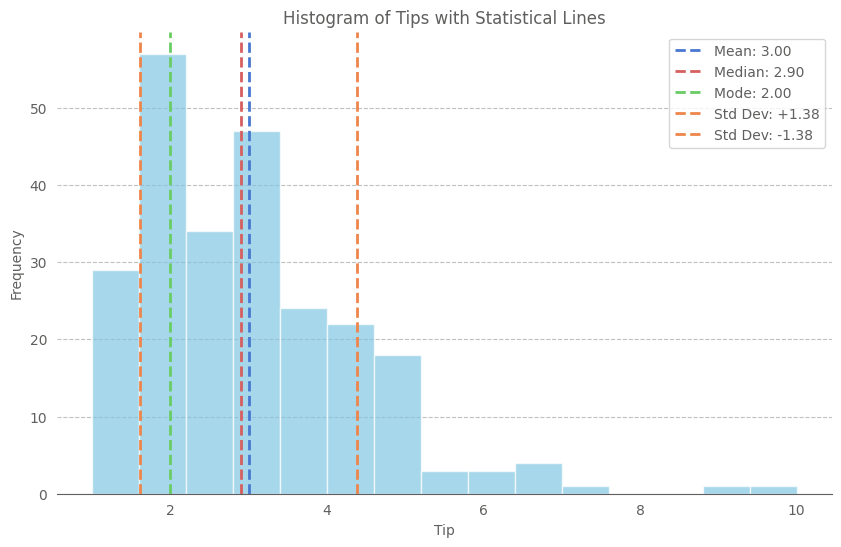

In [8]:
plt.figure(figsize=(10, 6))
plt.hist(df_tips['tip'], bins=15, alpha=0.7, color=palette[9])

plt.axvline(mean_value, color=palette[0], linestyle='--', linewidth=2, label=f'Mean: {mean_value:.2f}')
plt.axvline(median_value, color=palette[3], linestyle='--', linewidth=2, label=f'Median: {median_value:.2f}')
plt.axvline(mode_value, color=palette[2], linestyle='--', linewidth=2, label=f'Mode: {mode_value:.2f}')
plt.axvline(mean_value + std_value, color=palette[1], linestyle='--', linewidth=2, label=f'Std Dev: +{std_value:.2f}')
plt.axvline(mean_value - std_value, color=palette[1], linestyle='--', linewidth=2, label=f'Std Dev: -{std_value:.2f}')

plt.title('Histogram of Tips with Statistical Lines', color=label_color)
plt.xlabel('Tip', color=label_color)
plt.ylabel('Frequency', color=label_color)
legend = plt.legend()
for text in legend.get_texts():
    text.set_color(label_color)

plt.gca().spines['bottom'].set_color(label_color)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)

plt.show()

## **Boxplot**

In [9]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1000x600 with 0 Axes>

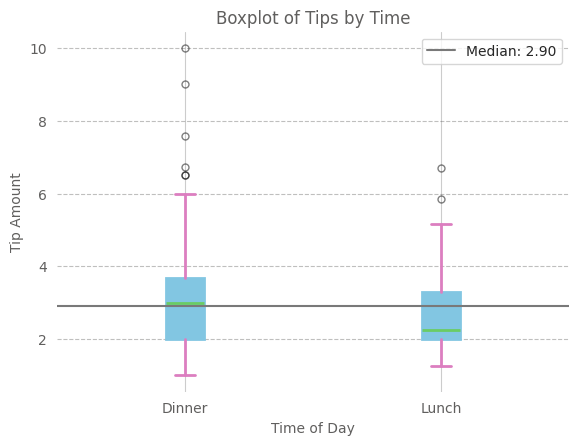

In [33]:
plt.figure(figsize=(10, 6))
boxplot = df_tips.boxplot(
    column='tip',
    by='time',
    patch_artist=True,
    return_type='dict'
)

for box in boxplot['tip']['boxes']:
    box.set(color=palette[9], linewidth=2)
    box.set_facecolor(palette[9])

for whisker in boxplot['tip']['whiskers']:
    whisker.set(color=palette[6], linewidth=2)

for cap in boxplot['tip']['caps']:
    cap.set(color=palette[6], linewidth=2)

for median in boxplot['tip']['medians']:
    median.set(color=palette[2], linewidth=2)

for flier in boxplot['tip']['fliers']:
    flier.set(marker='o', color=label_color, alpha=0.5, markersize=5)

median_value = df_tips['tip'].median()
plt.plot([plt.xlim()[0], plt.xlim()[1]], [median_value, median_value], color=palette[7], linestyle='-', linewidth=1.5, label=f'Median: {median_value:.2f}')

plt.title('Boxplot of Tips by Time', color=label_color)
plt.suptitle('')
plt.xlabel('Time of Day', color=label_color)
plt.ylabel('Tip Amount', color=label_color)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)
plt.legend()

plt.show()

## **Értékhez igazított (módosított) boxplot**

In [38]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


<Figure size 1000x600 with 0 Axes>

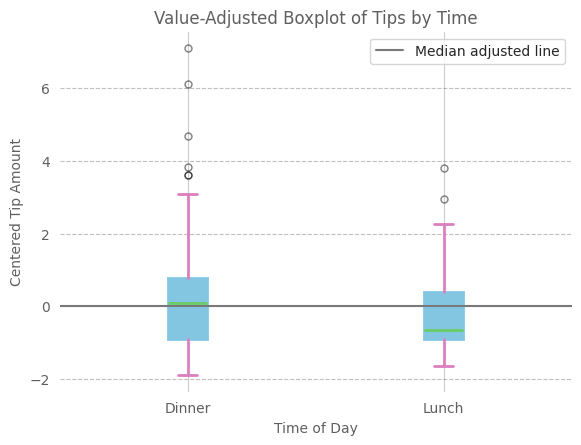

In [37]:
plt.figure(figsize=(10, 6))

adjusted_df = df_tips.copy()
adjusted_df['tip'] = adjusted_df['tip'] - median_value

boxplot_adjusted = adjusted_df.boxplot(
    column='tip',
    by='time',
    patch_artist=True,
    return_type='dict'
)

for box in boxplot_adjusted['tip']['boxes']:
    box.set(color=palette[9], linewidth=2)
    box.set_facecolor(palette[9])

for whisker in boxplot_adjusted['tip']['whiskers']:
    whisker.set(color=palette[6], linewidth=2)

for cap in boxplot_adjusted['tip']['caps']:
    cap.set(color=palette[6], linewidth=2)

for median in boxplot_adjusted['tip']['medians']:
    median.set(color=palette[2], linewidth=2)

for flier in boxplot_adjusted['tip']['fliers']:
    flier.set(marker='o', color=label_color, alpha=0.5, markersize=5)

plt.plot([plt.xlim()[0], plt.xlim()[1]], [0, 0], color=palette[7], linestyle='-', linewidth=1.5, label='Median adjusted line')

plt.title('Value-Adjusted Boxplot of Tips by Time', color=label_color)
plt.suptitle('')
plt.xlabel('Time of Day', color=label_color)
plt.ylabel('Centered Tip Amount', color=label_color)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.grid(True, axis='y', color=label_color, linestyle='--', alpha=0.4)
plt.legend()

plt.show()

## **Regressziós ábra**

In [39]:
df_tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [40]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


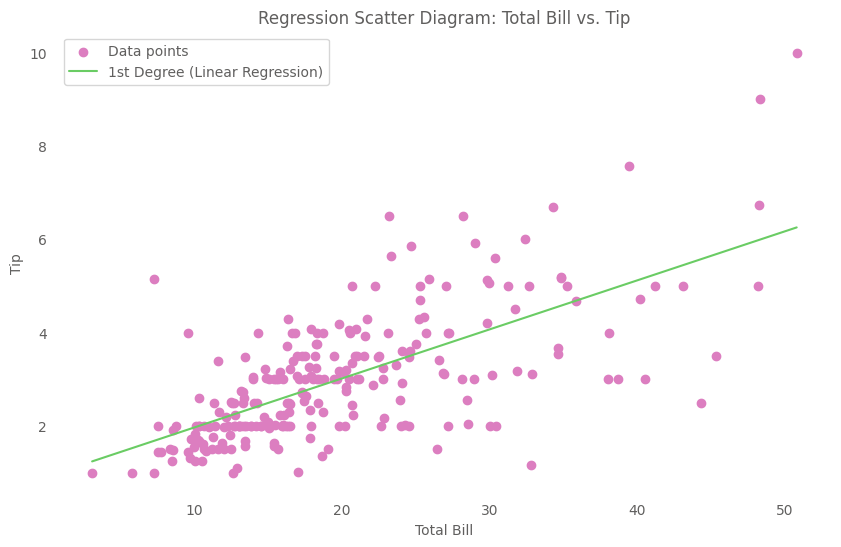

In [53]:
plt.figure(figsize=(10, 6))
plt.scatter(df_tips['total_bill'], df_tips['tip'], color=palette[6], label='Data points')

linear_model = LinearRegression()
linear_model.fit(df_tips[['total_bill']], df_tips['tip'])
x_range = np.linspace(min(df_tips['total_bill']), max(df_tips['total_bill']), 100)
y_linear = linear_model.predict(x_range.reshape(-1, 1))
plt.plot(x_range, y_linear, label='1st Degree (Linear Regression)', color=palette[2])

plt.title('Regression Scatter Diagram: Total Bill vs. Tip', color=label_color)
plt.xlabel('Total Bill', color=label_color)
plt.ylabel('Tip', color=label_color)
legend = plt.legend()
for text in legend.get_texts():
    text.set_color(label_color)
plt.grid(False)

plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

plt.tick_params(axis='x', colors=label_color)
plt.tick_params(axis='y', colors=label_color)

plt.show()